# Churning Telecom Company Prediction with Python

**Name: Moumita Saha**
<br>
**Student of Computer Science and Engineering**
<br>
**UODA,Dhaka,Bangladesh**

**Dataset Reference:**

 https://learn.datacamp.com/courses/marketing-analytics-predicting-customer-churn-in-python

**Objectives**

1.One-hot encoding
<br>
2.Decision Tree Classification
<br>
3.Data Transformation
<br>
4.Cross-Validation
<br>
5.Grid Search
<br>
6.Tree Diagram of decision tree
<br>
7.Confusion Matrix, Classification report, and ROC-AUC
<br>
8.Explaining accuracy, precision, recall, f1 score

**Importing Required Liabraries**

In [112]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

**Loading the Dataset**

Dataset Source:https://learn.datacamp.com/courses/marketing-analytics-predicting-customer-churn-in-python

In [113]:
df = pd.read_csv("Churn.csv")

display(df.head(10))

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,110,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,123,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,114,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,71,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,113,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626
5,118,0,223.4,220.6,203.9,6.3,0,no,yes,no,98,37.98,101,18.75,118,9.18,6,1.70,AL,510,391-8027
6,121,24,218.2,348.5,212.6,7.5,3,no,no,yes,88,37.09,108,29.62,118,9.57,7,2.03,MA,510,355-9993
7,147,0,157.0,103.1,211.8,7.1,0,no,yes,no,79,26.69,94,8.76,96,9.53,6,1.92,MO,415,329-9001
8,117,0,184.5,351.6,215.8,8.7,1,no,no,no,97,31.37,80,29.89,90,9.71,4,2.35,LA,408,335-4719
9,141,37,258.6,222.0,326.4,11.2,0,no,yes,yes,84,43.96,111,18.87,97,14.69,5,3.02,WV,415,330-8173


In [114]:
print(df.shape)

(3333, 21)


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   object 
 8   Intl_Plan       3333 non-null   object 
 9   Vmail_Plan      3333 non-null   object 
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

**Data Preprocessing**

In [116]:
print(df['Churn'].unique())
print(df['Intl_Plan'].unique())
print(df['Vmail_Plan'].unique())

['no' 'yes']
['no' 'yes']
['yes' 'no']


In [117]:
df = df.drop(['State', 'Area_Code', 'Phone'], axis=1)

df['Churn'] = df['Churn'].replace(({'no':0, 'yes':1}))
df['Intl_Plan'] = df['Intl_Plan'].replace(({'no':0, 'yes':1}))
df['Vmail_Plan'] = df['Vmail_Plan'].replace(({'no':0, 'yes':1}))

display(df.head(10))
print(df.shape)

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,110,45.07,99,16.78,91,11.01,3,2.70
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,123,27.47,103,16.62,103,11.45,3,3.70
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,71,50.90,88,5.26,89,8.86,7,1.78
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,113,28.34,122,12.61,121,8.41,3,2.73
5,118,0,223.4,220.6,203.9,6.3,0,0,1,0,98,37.98,101,18.75,118,9.18,6,1.70
6,121,24,218.2,348.5,212.6,7.5,3,0,0,1,88,37.09,108,29.62,118,9.57,7,2.03
7,147,0,157.0,103.1,211.8,7.1,0,0,1,0,79,26.69,94,8.76,96,9.53,6,1.92
8,117,0,184.5,351.6,215.8,8.7,1,0,0,0,97,31.37,80,29.89,90,9.71,4,2.35
9,141,37,258.6,222.0,326.4,11.2,0,0,1,1,84,43.96,111,18.87,97,14.69,5,3.02


(3333, 18)


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   int64  
 8   Intl_Plan       3333 non-null   int64  
 9   Vmail_Plan      3333 non-null   int64  
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

**Checking Missing Values**

In [119]:
df.isnull().sum()

Account_Length    0
Vmail_Message     0
Day_Mins          0
Eve_Mins          0
Night_Mins        0
Intl_Mins         0
CustServ_Calls    0
Churn             0
Intl_Plan         0
Vmail_Plan        0
Day_Calls         0
Day_Charge        0
Eve_Calls         0
Eve_Charge        0
Night_Calls       0
Night_Charge      0
Intl_Calls        0
Intl_Charge       0
dtype: int64

**No missing value exists in this dataset**

**Target Variable**

In [120]:
df['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

**Feature and target variable separation**

In [121]:
X = df.drop('Churn', axis=1)
y = df[['Churn']]

print("Features:" ,X.shape)
print("Targets:" ,y.shape)

Features: (3333, 17)
Targets: (3333, 1)


**One-hot Encoding or Label Encoding**

**One-hot Encoding is applied when:**
<br>
(i)The categorical feature is not ordinal
<br>
(ii)The number of categorical features is less so one-hot encoding can be effectively applied.
<br>
<br>
In the given dataset, there are three categorical features that are NAN columns. So, there are less number of categorical variables.
<br>
<br>
Also, each label is assigned a unique integer based on alphabetical ordering in Label Encoding technique. And prediction performance is not also better than One-hot encoding for this dataset.
<br>
<br>
**These are the reasons of choosing One-hot Encoding**

**One-hot Encoding**

In [122]:
df = pd.get_dummies(df, drop_first=True)

**Train Test Separation**

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42, stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2666, 17) (667, 17) (2666, 1) (667, 1)


**Stratification**

In [124]:
class_0_train = y_train['Churn'].value_counts().values[0]
class_1_train = y_train['Churn'].value_counts().values[1]

train_ratio = class_1_train/class_0_train
print(train_ratio)

0.1692982456140351


In [125]:
class_0_test = y_test['Churn'].value_counts().values[0]
class_1_test = y_test['Churn'].value_counts().values[1]

test_ratio = class_1_test/class_0_test
print(test_ratio)

0.17017543859649123


**Training: Decision Tree Classifier**

In [126]:
model = DecisionTreeClassifier()
model = model.fit(X_train, y_train)

**Prediction**

In [127]:
y_pred = model.predict(X_test)

**Prediction Comparison with the test data**

In [128]:
y_test['probability'] = np.round(model.predict_proba(X_test)[:,1], 2)
y_test['predicted_Churn'] = y_pred

display(y_test.sample(10))

,Churn,probability,predicted_Churn
887,0,0.0,0
757,0,0.0,0
3143,0,0.0,0
2266,0,0.0,0
2945,0,0.0,0
2980,1,1.0,1
2789,0,0.0,0
2419,1,1.0,1
2743,0,0.0,0
137,0,0.0,0


In [129]:
test = pd.concat([X_test, y_test], axis=1)
display(test.sample(10))

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Churn,probability,predicted_Churn
680,116,0,189.5,189.8,205.8,13.1,1,0,0,90,32.22,118,16.13,83,9.26,2,3.54,0,0.0,0
259,59,0,155.2,235.3,169.4,8.7,1,0,0,79,26.38,123,20.00,80,7.62,4,2.35,0,0.0,0
1315,124,0,254.3,78.9,153.2,11.8,2,0,0,113,43.23,104,6.71,69,6.89,2,3.19,0,0.0,0
2724,182,0,279.1,180.5,217.5,9.5,2,0,0,124,47.45,108,15.34,104,9.79,11,2.57,1,1.0,1
989,178,0,275.4,187.5,147.1,13.6,1,0,0,150,46.82,62,15.94,126,6.62,3,3.67,0,1.0,1
1174,72,39,92.8,271.2,167.1,5.8,1,0,1,98,15.78,115,23.05,83,7.52,7,1.57,0,0.0,0
3116,149,0,187.6,201.4,264.2,8.8,1,0,0,83,31.89,81,17.12,79,11.89,1,2.38,0,0.0,0
2102,111,0,246.5,216.3,179.6,12.7,2,0,0,108,41.91,89,18.39,99,8.08,3,3.43,0,0.0,0
2370,85,0,183.4,168.8,199.7,9.9,4,0,0,111,31.18,98,14.35,97,8.99,4,2.67,0,0.0,0
898,125,0,140.1,209.6,264.1,8.0,1,0,0,132,23.82,126,17.82,77,11.88,2,2.16,0,0.0,0


**Data Transformation (StandardScaler or MinMaxScaler)**

In [130]:
# scaler = StandardScaler() # For StandardScaler
# scaler = MinMaxScaler() # For MinMaxScaler

# print(scaler.fit(test))

In [131]:
# print(scaler.mean_) # For StandardScaler
# print(scaler.data_max_) # For MinMaxScaler

In [132]:
# print(scaler.transform(test.head(10)))

**Does Data Transformation improve model performance?**
<br>
No, Data transmission does not improve model performance actually. From this model, I am getting betetr precision with Standard Scaler or Min Max Scaler transformation.
<br>
<br>
**Is it necessary to standardize or normalize data for tree-based machine learning models?**
<br>
Tree based algorithms such as Decision Tree, is not sensitive to the magnitude of variables. So standardization is not needed before fitting this kind of models. And doesn't require normalization also.

**Tree Diagram of the Decision Tree**

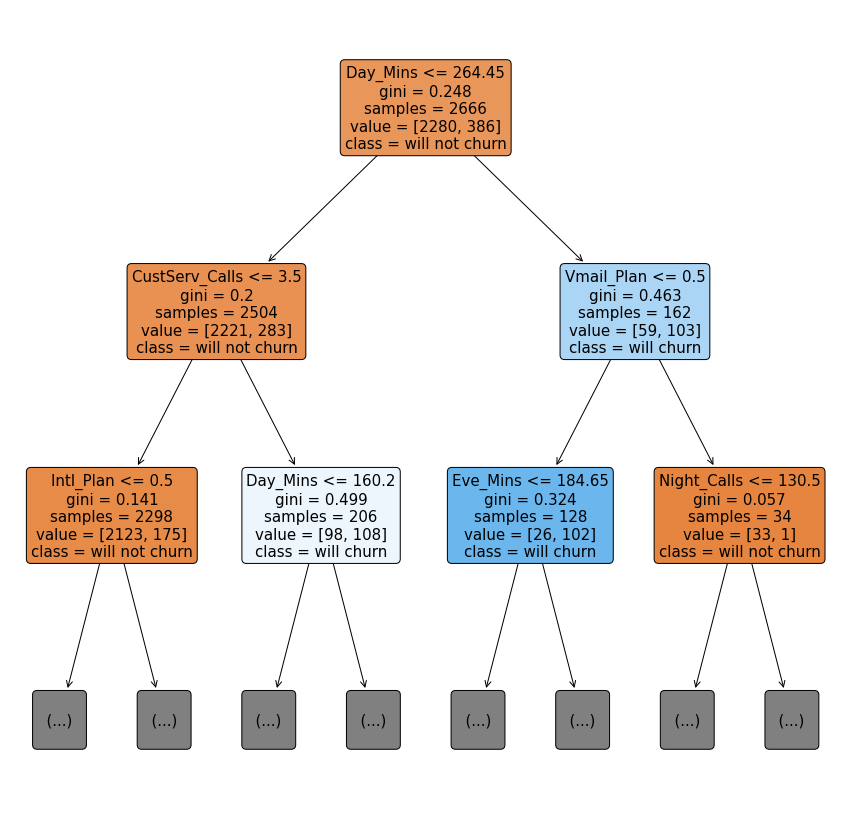

In [133]:
plt.figure(figsize = (15, 15))
plot_tree(model, 
          filled=True,
          rounded=True,
          class_names = ["will not churn", "will churn"],
          feature_names = X.columns,
          max_depth=2, 
          fontsize=15)

plt.show()

**Confusion Matrix**

In [134]:
confusion_matrix_ = confusion_matrix(y_test['Churn'], 
                                     y_test['predicted_Churn'])

print('confusion_matrix: \n', confusion_matrix_)

confusion_matrix: 
 [[535  35]
 [ 34  63]]


In [135]:
y_test['Churn'].value_counts()

0    570
1     97
Name: Churn, dtype: int64

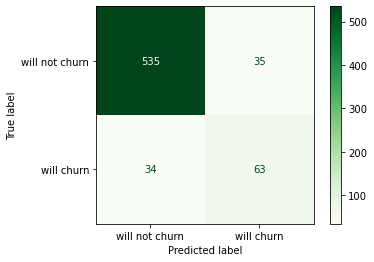

In [136]:
plot_confusion_matrix(model, 
                      X_test, 
                      y_test['Churn'], 
                      display_labels=["will not churn", "will churn"],
                      cmap='Greens')
plt.show()

In [137]:
TN = confusion_matrix_[0,0]
print("True Negatives = ", TN)

FN = confusion_matrix_[1,0]
print("False Negatives = ", FN)

FP = confusion_matrix_[0,1]
print("False Positives = ", FP)

TP = confusion_matrix_[1,1]
print("True Positives = ", TP)

True Negatives =  535
False Negatives =  34
False Positives =  35
True Positives =  63


**Accuracy, Precision, Recall, f1 score**

**Accuracy**

In [138]:
# calculate the accuracy of the model using the sklearn built-in function
accuracy_ = accuracy_score(y_test['Churn'], 
                           y_test['predicted_Churn'])

print('Accuracy = ', np.round(accuracy_*100, 2),"%") #Higher Better

Accuracy =  89.66 %


**Precision, Recall, f1 score**

In [139]:
precision_ = np.round(precision_score(y_test['Churn'], 
                                      y_test['predicted_Churn']), 2)
recall_ = np.round(recall_score(y_test['Churn'], 
                                y_test['predicted_Churn']), 2)
f1_score__ = np.round(f1_score(y_test['Churn'], 
                               y_test['predicted_Churn']), 2)

print("Precision = ", precision_*10)
print("Recall = ", recall_*10)
print("f1 score = ", f1_score__*10)

Precision =  6.4
Recall =  6.5
f1 score =  6.5


**True Positive Rate, False Positive Rate**

In [140]:
TPR = np.round(TP/(TP+FN), 2)
FPR = np.round(FP/(FP+TN), 2)

print("True Positive Rate = ", TPR)
print("False Positive Rate = ", FPR)

True Positive Rate =  0.65
False Positive Rate =  0.06


**ROC-AUC**

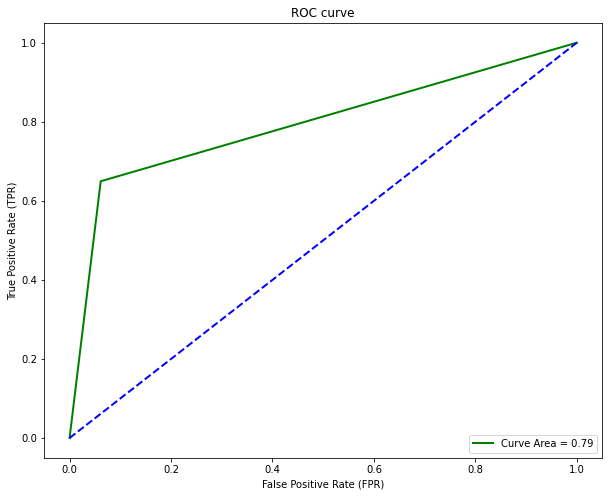

In [141]:
fpr, tpr, thr = roc_curve(y_test['Churn'], 
                          y_test['probability'])
auc = np.round(roc_auc_score(y_test['Churn'], 
                             y_test['predicted_Churn']), 2)

plt.figure(figsize=(10, 8))
plt.plot(fpr, 
         tpr, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [142]:
roc_data = pd.DataFrame({"threshold": thr, "FPR": fpr, "TPR": tpr})
display(roc_data.tail(10))

,threshold,FPR,TPR
0,2.0,0.000000,0.000000
1,1.0,0.061404,0.649485
2,0.0,1.000000,1.000000


**Grid Search and Cross-Validation with Decision Tree Classifier**

In [143]:
parameters = {'criterion': ['gini','entropy'],
              'max_depth': [3, 4, 5, 6, 7]}

model = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=model,
                           param_grid=parameters,
                           scoring="accuracy",
                           cv=5,
                           n_jobs=-1)

# fit the model with the best hyper-parameters
grid_result = grid_search.fit(X_train, y_train)

**Hyperparameters for grid search in each iteration**
<br>
iteration 1: criterion='gini', max_depth=3
<br>
iteration 2: criterion='gini', max_depth=4
<br>
iteration 3: criterion='gini', max_depth=5
<br>
iteration 4: criterion='gini', max_depth=6
<br>
iteration 5: criterion='gini', max_depth=7
<br>
iteration 6: criterion='entropy', max_depth=3
<br>
iteration 7: criterion='entropy', max_depth=4
<br>
iteration 8: criterion='entropy', max_depth=5
<br>
iteration 9: criterion='entropy', max_depth=6
<br>
iteration 10: criterion='entropy', max_depth=7

**Best Hyperparameters in the grid search**

In [144]:
y_pred = np.round(grid_result.predict(X_test), 2)

In [145]:
cv_result = pd.DataFrame(grid_result.cv_results_)
cv_result = cv_result[['param_criterion', 'param_max_depth',
                       'split0_test_score',
                       'split1_test_score', 'split2_test_score', 'split3_test_score',
                       'split4_test_score', 'mean_test_score', 'std_test_score',
                       'rank_test_score']]
cv_result = cv_result.sort_values(by='rank_test_score')
display(cv_result)
print(cv_result.columns)


,param_criterion,param_max_depth,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,gini,6,0.943820,0.951220,0.954972,0.949343,0.947467,0.949364,0.003721,1
9,entropy,7,0.945693,0.941839,0.958724,0.951220,0.943715,0.948238,0.006111,2
8,entropy,6,0.943820,0.934334,0.958724,0.949343,0.943715,0.945987,0.007989,3
4,gini,7,0.936330,0.945591,0.958724,0.949343,0.938086,0.945615,0.008107,4
2,gini,5,0.930712,0.943715,0.947467,0.953096,0.938086,0.942615,0.007705,5
7,entropy,5,0.934457,0.938086,0.951220,0.945591,0.939962,0.941863,0.005902,6
1,gini,4,0.923221,0.932458,0.924953,0.930582,0.917448,0.925732,0.005372,7
6,entropy,4,0.923221,0.926829,0.924953,0.932458,0.917448,0.924982,0.004882,8
0,gini,3,0.898876,0.919325,0.904315,0.904315,0.904315,0.906229,0.006878,9
5,entropy,3,0.898876,0.881801,0.904315,0.906191,0.904315,0.899100,0.008989,10


Index(['param_criterion', 'param_max_depth', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')


**Model performance evaluation with the best found model in grid search and cross-validation**

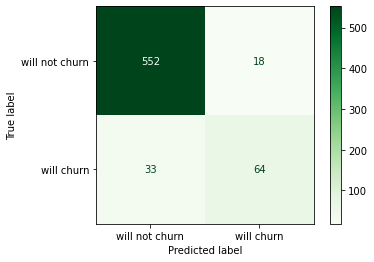

In [146]:
plot_confusion_matrix(grid_result, 
                      X_test, 
                      y_test['Churn'], 
                      display_labels=["will not churn", "will churn"],
                      cmap='Greens')
plt.show()

In [147]:
confusion_matrix_dt = confusion_matrix(y_test['Churn'], y_pred)
print('confusion_matrix: \n', confusion_matrix_dt)

print('Accuracy: ', accuracy_score(y_test['Churn'], y_pred))

print(classification_report(y_test['Churn'], y_pred))

confusion_matrix: 
 [[552  18]
 [ 33  64]]
Accuracy:  0.9235382308845578
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       570
           1       0.78      0.66      0.72        97

    accuracy                           0.92       667
   macro avg       0.86      0.81      0.84       667
weighted avg       0.92      0.92      0.92       667



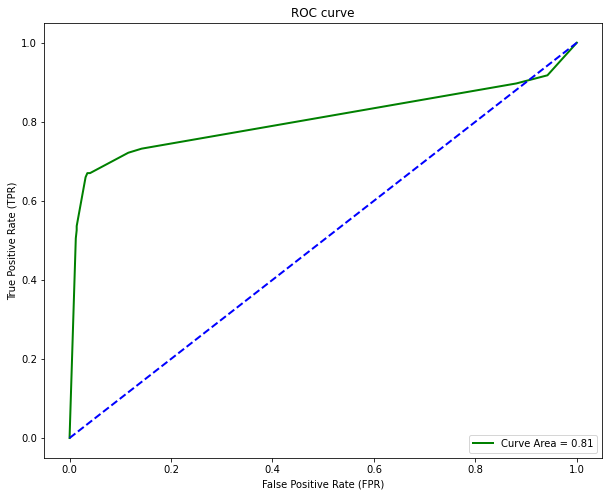

In [148]:
fpr, tpr, thr = roc_curve(y_test['Churn'], grid_result.predict_proba(X_test)[:,1])
auc = np.round(roc_auc_score(y_test['Churn'], y_pred), 2)

plt.figure(figsize=(10, 8))
plt.plot(fpr, 
         tpr, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [149]:
y_test['pred'] = y_pred
y_test['probability'] = grid_result.predict_proba(X_test)[:,1]

display(y_test.head(20))

,Churn,probability,predicted_Churn,pred
601,1,1.000000,1,1
2050,0,0.023556,0,0
3200,0,0.022556,0,0
1953,0,0.023556,0,0
1119,0,0.023556,0,0
2204,0,0.023556,0,0
1888,0,0.023556,0,0
738,0,0.023556,0,0
3087,0,0.023556,0,0
539,0,0.023556,0,0


**Classification report**

In [150]:
class_report = classification_report(y_test['Churn'], 
                                     y_test['predicted_Churn'])
print("Classification Report: \n", class_report)

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       570
           1       0.64      0.65      0.65        97

    accuracy                           0.90       667
   macro avg       0.79      0.79      0.79       667
weighted avg       0.90      0.90      0.90       667



**Outcome**

**Model Result:**
<br>
Model is saying that 90.85% customers will churn.
<br>
<br>
**About the model:**
<br>
We are getting the Precision value from the model is 7.0 out of 10 that should be more closer to 10. The Accuracy of the model is 90.85%. The accuracy rate is good enough but the precision value should be greater than 8 then we can say this model is pretty good, but the model is accurately resulting but the precision is not satisfactory.